# Product Design Challenge

Tools for the review of a battery compartment button.

In [1]:
import scipy as sp
from matplotlib import pyplot as plt

In [2]:
def button_spring(theta=45, F_0=3.3, F1=1.16, F_3=7, mu=0.05, printout=True):

    '''
    ## Given
    theta = 45                  # [degrees] Ramp Angle
    F_0 = 3.3                   # [N] Input force
    F_1 = F0/2 * sp.cos(theta)  # [N] Force at ramp
    F_3 = 4*F1/2                # [N] Force acting on latches from cassette
    mu = 0.05                   # Coefficient of friction
    
    Returns the maximum spring force F_2 requried to return the latch
    and button to there starting positions.
    '''

    theta = theta*sp.pi/180     # [rad]
    f_k = F1*mu

    ## Sum of the forces in y axis
    # Solve for R

    F_1y = F1*sp.cos(theta)
    f_ky = f_k*sp.sin(theta)

    R = F_3 - f_ky - F_1y

    ## Sum of the forces in the x axis
    # Solve for F_2

    f_kR = R * mu
    f_k3 = F_3 * mu

    F_1x = F1*sp.sin(theta)
    f_kx = f_k*sp.cos(theta)

    F_2 = -f_k3 - f_kR - f_kx + F_1x
    
    if(printout):
        print('F_2 = %.3f N\n' %F_2)
        print('Forces in the X axis:')
        print('f_kR = %.2f N' %f_kR)
        print('f_k3 = %.2f N' %f_k3)
        print('f_kx = %.2f N' %f_kx)
        print('F_1x = %.2f N\n' %F_1x)

        print('Forces in the Y axis:')
        print('f_ky = %.2f N' %f_ky)
        print('F_1y = %.2f N' %F_1y)
        print('F_3 = %.2f N' %F_3)
        print('R = %.2f N' %R)
    
    return(F_2)

In [3]:
theta = 45
F_0 = 3.3
F_1 = F_0/2 * sp.cos(theta)
F_3 = 2*F_1/2
mu = 0.05

F_2 = button_spring(theta, F_0, F_1, F_3, mu, printout=True)

F_2 = 0.528 N

Forces in the X axis:
f_kR = 0.01 N
f_k3 = 0.04 N
f_kx = 0.03 N
F_1x = 0.61 N

Forces in the Y axis:
f_ky = 0.03 N
F_1y = 0.61 N
F_3 = 0.87 N
R = 0.22 N


In [4]:
#Spring Deflectio
# Assumes the spring acts similar to a cantilever beam
# Solve for the thickness of the spring given the concept shape

delta = 2.0         # [mm] deflection of the spring
L = 3.5             # [mm] effective length of the spring
E = 2.07e5          # [MPa] Young's Modulus of spring steel
b = 5.0             # [mm] depth of the spring shape

h = (((F_2 * L**3)/(3 * E * delta)) * (12/b))**(1/3)

k = F_2 / delta

print('Spring Thickness : %.4f mm' %h)
print('Spring Stiffness : %.1f N/mm' %k)

Spring Thickness : 0.0352 mm
Spring Stiffness : 0.3 N/mm


In [5]:
theta_i = sp.linspace(1,89,200)
F2_theta = sp.zeros(len(theta_i))
for i in range(len(theta_i)):
    F2_theta[i-1] = button_spring(theta_i[i-1], F_0, F_1, F_3, mu, printout=False)

theta_j = sp.linspace(10,70,200)
ramp_height = sp.zeros(len(theta_j))
for j in range(len(theta_j)):
    ramp_height[j-1] = sp.tan(theta_j[j-1]*sp.pi/180)*2

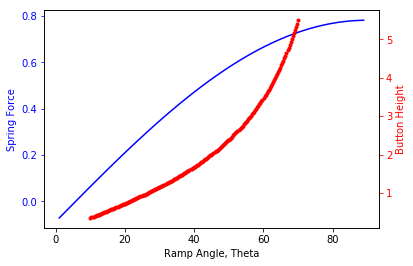

In [6]:
fig, ax1 = plt.subplots()
ax1.plot(theta_i, F2_theta, 'b-')
ax1.set_xlabel('Ramp Angle, Theta')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Spring Force', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(theta_j, ramp_height, 'r.')
ax2.set_ylabel('Button Height', color='r')
ax2.tick_params('y', colors='r')

plt.show()